https://www.youtube.com/watch?v=wAZiKSRu4d8

In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
H = ox.graph_from_place("Nashville, Tennessee", network_type="drive")
fig, ax = ox.plot_graph(H)

KeyboardInterrupt: 

In [ ]:
place = 'Nashville, Tennessee'
cf = '["highway"~"motorway|trunk|primary|secondary"]'
highways = ox.graph_from_place(place, network_type="walk", custom_filter=cf)
fig, ax = ox.plot_graph(highways, node_size=0, edge_linewidth=0.5)

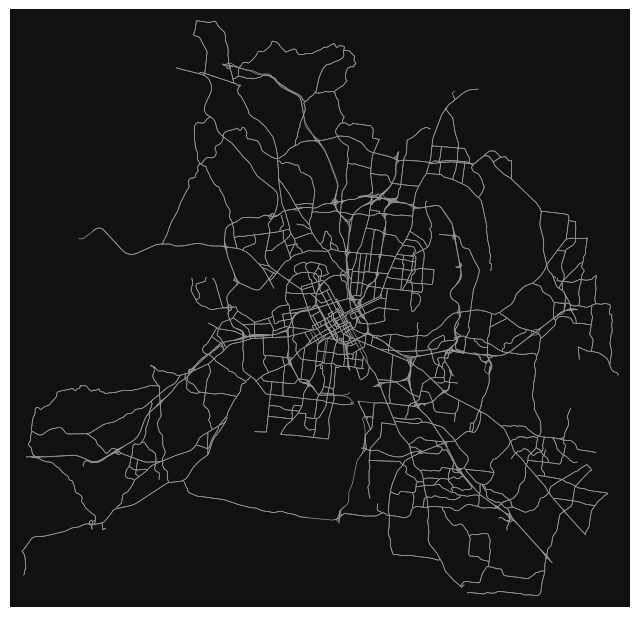

In [6]:
place = 'Nashville, Tennessee'
cf = '["highway"~"motorway|trunk|primary|secondary|tertiary"]'
highways = ox.graph_from_place(place, network_type="drive", custom_filter=cf)
fig, ax = ox.plot_graph(highways, node_size=0, edge_linewidth=0.5)

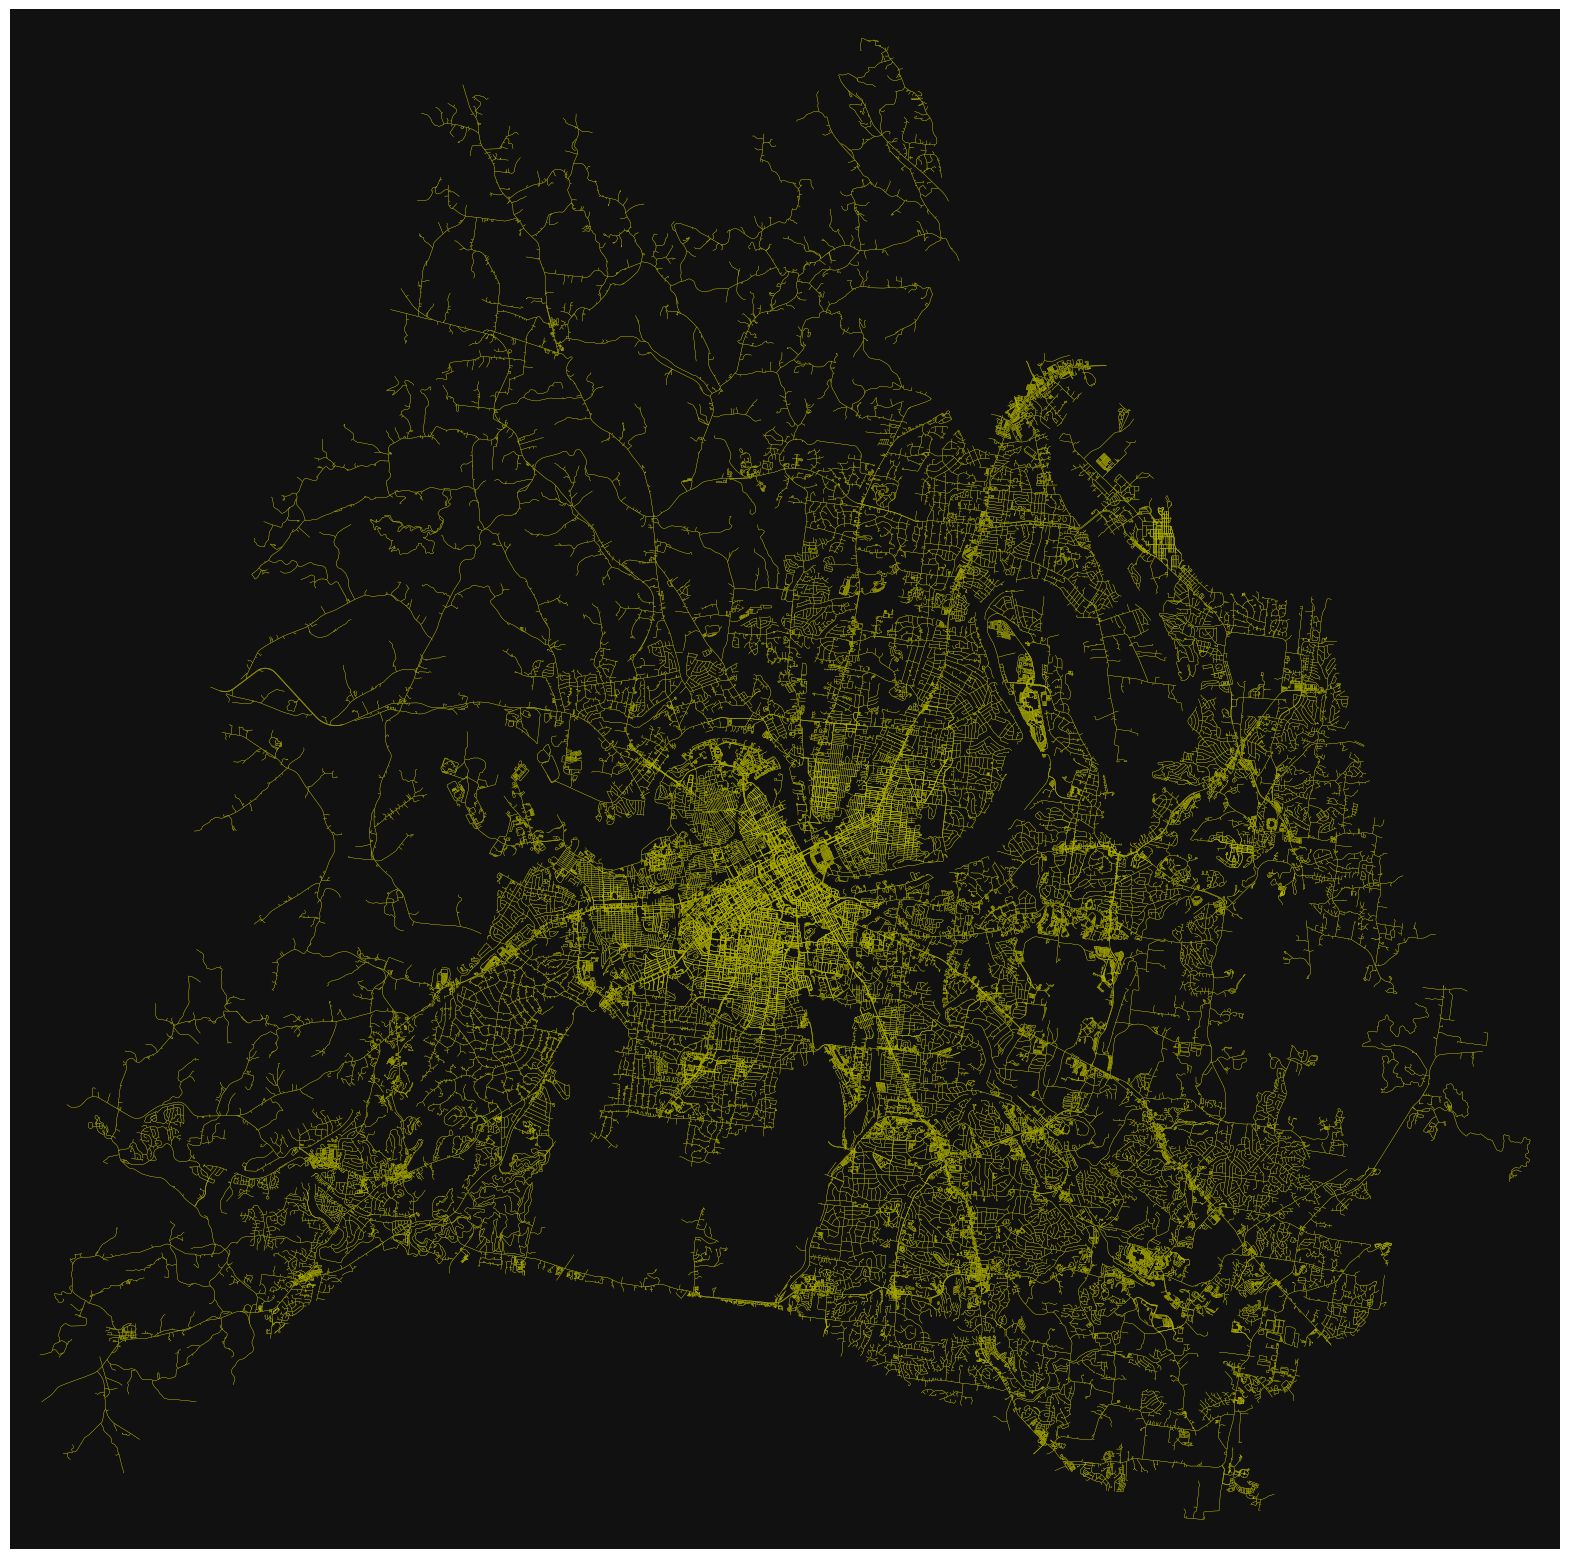

In [3]:
#place = 'Nashville, Tennessee'
place = {'city': 'Nashville', 'state': 'Tennessee', 'country': 'United States'}
G = ox.graph_from_place(place, network_type="walk", truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(20, 20), node_size=0, edge_color="y", edge_linewidth=0.2)

In [11]:
place = {'city': 'Nashville', 'state': 'Tennessee', 'country': 'United States'}
gdf = ox.geocode_to_gdf(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type="bike")

# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
pd.Series(stats)

n                                                                           77683
m                                                                          199029
k_avg                                                                    5.124133
edge_length_total                                                      16904779.6
edge_length_avg                                                         84.936264
streets_per_node_avg                                                     2.659565
streets_per_node_counts         {0: 0, 1: 16573, 2: 662, 3: 53219, 4: 7109, 5:...
streets_per_node_proportions    {0: 0.0, 1: 0.21334140030637333, 2: 0.00852181...
intersection_count                                                          61110
street_length_total                                                   8739699.231
street_segment_count                                                       103247
street_length_avg                                                       84.648457
circuity_avg    

In [12]:
stats

{'n': 77683,
 'm': 199029,
 'k_avg': 5.124132693124622,
 'edge_length_total': 16904779.599999517,
 'edge_length_avg': 84.93626355957934,
 'streets_per_node_avg': 2.659565155825599,
 'streets_per_node_counts': {0: 0,
  1: 16573,
  2: 662,
  3: 53219,
  4: 7109,
  5: 109,
  6: 9,
  7: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.21334140030637333,
  2: 0.00852181300928131,
  3: 0.6850791035361662,
  4: 0.09151294362988041,
  5: 0.0014031383957880102,
  6: 0.00011585546387240451,
  7: 2.5745658638312115e-05},
 'intersection_count': 61110,
 'street_length_total': 8739699.230999842,
 'street_segment_count': 103247,
 'street_length_avg': 84.64845691400082,
 'circuity_avg': 1.1135137589830195,
 'self_loop_proportion': 0.01028601315292454,
 'node_density_km': 60.224567759456804,
 'intersection_density_km': 47.376174140808224,
 'edge_density_km': 13105.609264303052,
 'street_density_km': 6775.5443087242065}

In [14]:
pd.DataFrame(stats.items(), columns = ['Thing', 'Value'])

,Thing,Value
0,n,77683
1,m,199029
2,k_avg,5.124133
3,edge_length_total,16904779.6
4,edge_length_avg,84.936264
5,streets_per_node_avg,2.659565
6,streets_per_node_counts,"{0: 0, 1: 16573, 2: 662, 3: 53219, 4: 7109, 5:..."
7,streets_per_node_proportions,"{0: 0.0, 1: 0.21334140030637333, 2: 0.00852181..."
8,intersection_count,61110
9,street_length_total,8739699.231


https://python.plainenglish.io/osmnx-the-fastest-way-to-get-data-from-openstreetmaps-731419d4dc31

In [30]:
import osmnx as ox
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import tempfile
import geopandas as gpd
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import contextily as ctx

In [34]:
p = ox.geocode_to_gdf('Nashville, Tennessee')

<Axes: >

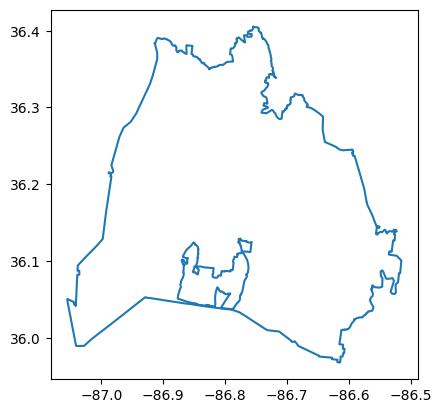

In [35]:
p.boundary.plot()

<Axes: >

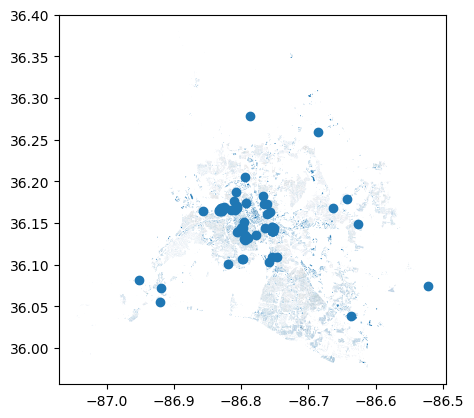

In [36]:
build1 = ox.geometries_from_place('Nashville, Tennessee', tags = {'building':True})
build1.plot()

In [37]:
build1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 132424 entries, ('node', 356901146) to ('relation', 15654544)
Columns: 263 entries, amenity to public_transport
dtypes: geometry(1), object(262)
memory usage: 271.4+ MB


In [38]:
build1.head()

amenity  ele gnis:county_id gnis:created   
element_type osmid                                                
node         356901146     NaN  NaN            NaN          NaN  \
             368157068     NaN  153            NaN          NaN   
             368157072     NaN  153            NaN          NaN   
             368157073     NaN  155            NaN          NaN   
             368157082     NaN  150            NaN          NaN   

                       gnis:feature_id gnis:state_id   
element_type osmid                                     
node         356901146         2453947           NaN  \
             368157068         1954163           NaN   
             368157072         1954169           NaN   
             368157073         1954168           NaN   
             368157082         1954191           NaN   

                                                                 name   
element_type osmid                                                      
node         356901146                        George Hubbard Hospital  \
             368157068                        Alger V Boswell Complex   
             368157072  Harold M Love Senior Learning Resource Center   
             368157073                                 Goodwill Manor   
             368157082      Otis L Floyd-Joseph A Payne Campus Center   

                                          geometry  building addr:state  ...   
element_type osmid                                                       ...   
node         356901146  POINT (-86.80639 36.16752)  hospital        NaN  ...  \
             368157068  POINT (-86.83139 36.16506)       yes         TN  ...   
             368157072  POINT (-86.83028 36.16756)       yes         TN  ...   
             368157073  POINT (-86.82944 36.16839)       yes         TN  ...   
             368157082  POINT (-86.82833 36.16645)       yes         TN  ...   

                       fuel:diesel fuel:octane_87 fuel:octane_89   
element_type osmid                                                 
node         356901146         NaN            NaN            NaN  \
             368157068         NaN            NaN            NaN   
             368157072         NaN            NaN            NaN   
             368157073         NaN            NaN            NaN   
             368157082         NaN            NaN            NaN   

                       fuel:octane_93 playground:theme abandoned ways type   
element_type osmid                                                           
node         356901146            NaN              NaN       NaN  NaN  NaN  \
             368157068            NaN              NaN       NaN  NaN  NaN   
             368157072            NaN              NaN       NaN  NaN  NaN   
             368157073            NaN              NaN       NaN  NaN  NaN   
             368157082            NaN              NaN       NaN  NaN  NaN   

                       park_ride public_transport  
element_type osmid                                 
node         356901146       NaN              NaN  
             368157068       NaN              NaN  
             368157072       NaN              NaN  
             368157073       NaN              NaN  
             368157082       NaN              NaN  

[5 rows x 263 columns]

In [39]:
build1['building'].unique()

array(['hospital', 'yes', 'dormitory', 'school', 'Gymnasium', 'bunker',
       'office', 'apartments', 'warehouse', 'Business School',
       'commercial', 'university', 'retail', 'church', 'stadium',
       'parking', 'train_station', 'storage_tank', 'industrial', 'house',
       'grandstand', 'roof', 'hotel', 'residential', 'hangar', 'public',
       'no', 'prison', 'pavilion', 'shed', 'cabin', 'retr', 'manufacture',
       'construction', 'restaurant', 'detached', 'government', 'terrace',
       'greenhouse', 'service', 'civic', 'garage', 'stadium;yes', 'barn',
       'farm_auxiliary', 'boathouse', 'gazebo', 'hut',
       'semidetached_house', 'garages', 'carport', 'chapel',
       'kindergarten', 'stable', 'static_caravan', 'fire_station',
       'transportation'], dtype=object)

<AxesSubplot:>

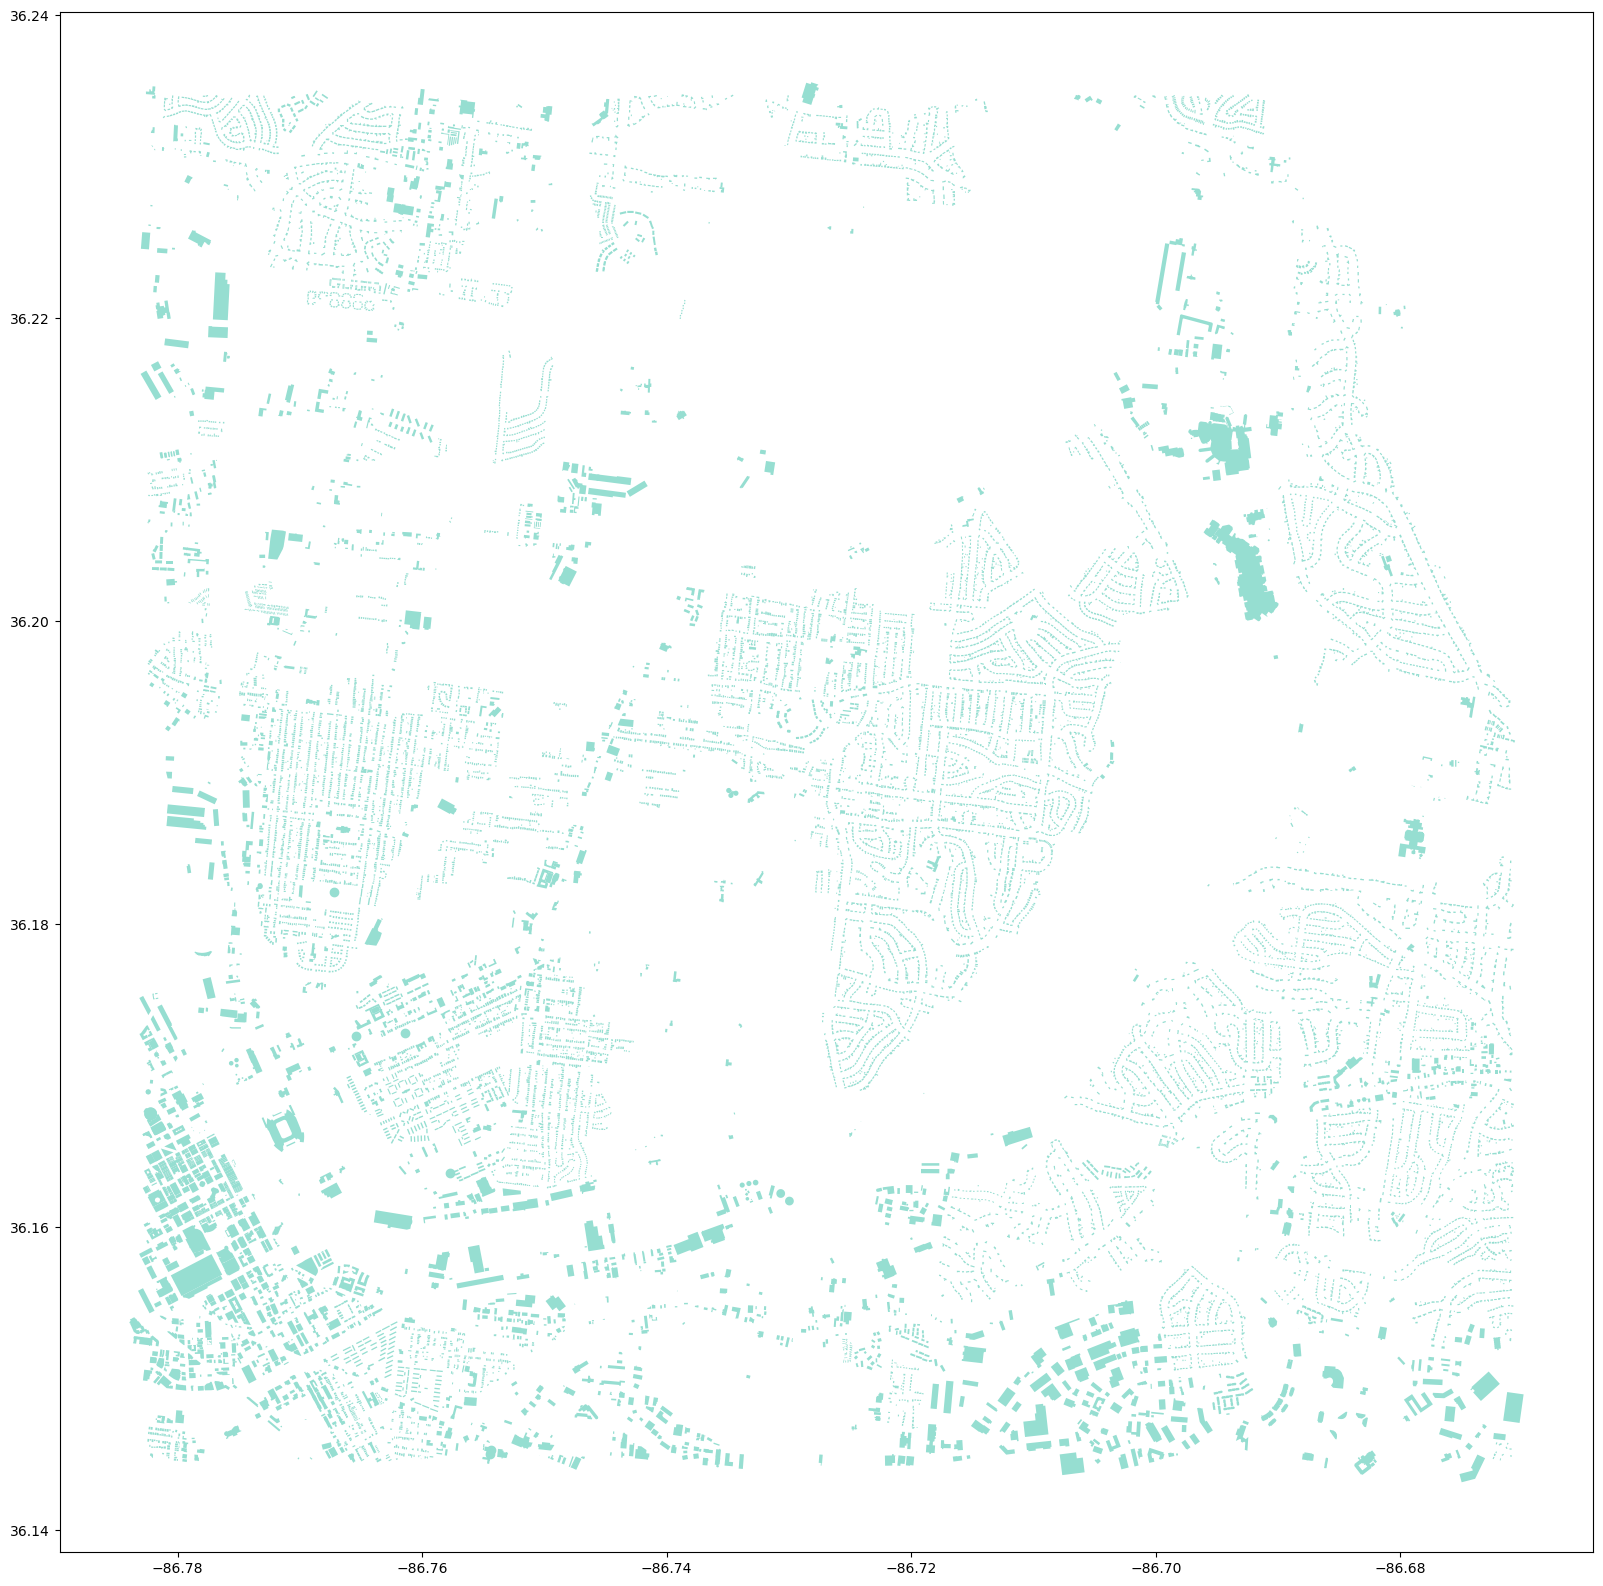

In [14]:
build2 = ox.geometries_from_point((36.18964819866301, -86.72661903393482), dist = 5000, tags = {'building':True})
build2.plot(figsize = (20, 20), color = '#96DED1')

In [16]:
build2.head()

addr:state   building  ele gnis:county_name  \
element_type osmid                                                    
node         368157132          TN        yes  131         Davidson   
             368157667          TN        yes  148         Davidson   
             368157672          TN        yes  136         Davidson   
             2287625659        NaN     office  NaN              NaN   
             3799952571        NaN  warehouse  NaN              NaN   

                        gnis:feature_id                      gnis:import_uuid  \
element_type osmid                                                              
node         368157132          2453547  57871b70-0100-4405-bb30-88b2e001a944   
             368157667          1324429  57871b70-0100-4405-bb30-88b2e001a944   
             368157672          1324624  57871b70-0100-4405-bb30-88b2e001a944   
             2287625659             NaN                                   NaN   
             3799952571             NaN                                   NaN   

                        gnis:reviewed                            name  \
element_type osmid                                                      
node         368157132             no         Woodcock Baptist Center   
             368157667             no      East Park Community Center   
             368157672             no  McFerrin Park Community Center   
             2287625659           NaN   Nashville Baptist Association   
             3799952571           NaN               Nashville Airsoft   

                                           source                    geometry  \
element_type osmid                                                              
node         368157132              USGS Geonames  POINT (-86.75773 36.16358)   
             368157667              USGS Geonames  POINT (-86.76139 36.17283)   
             368157672              USGS Geonames  POINT (-86.76720 36.18214)   
             2287625659                       NaN  POINT (-86.76540 36.17265)   
             3799952571  www.nashvilleairsoft.com  POINT (-86.76121 36.16042)   

                         ... fuel:octane_89 fuel:octane_93 abandoned  \
element_type osmid       ...                                           
node         368157132   ...            NaN            NaN       NaN   
             368157667   ...            NaN            NaN       NaN   
             368157672   ...            NaN            NaN       NaN   
             2287625659  ...            NaN            NaN       NaN   
             3799952571  ...            NaN            NaN       NaN   

                        construction ways type park_ride disused:amenity  \
element_type osmid                                                         
node         368157132           NaN  NaN  NaN       NaN             NaN   
             368157667           NaN  NaN  NaN       NaN             NaN   
             368157672           NaN  NaN  NaN       NaN             NaN   
             2287625659          NaN  NaN  NaN       NaN             NaN   
             3799952571          NaN  NaN  NaN       NaN             NaN   

                        addr:country public_transport  
element_type osmid                                     
node         368157132           NaN              NaN  
             368157667           NaN              NaN  
             368157672           NaN              NaN  
             2287625659          NaN              NaN  
             3799952571          NaN              NaN  

[5 rows x 159 columns]

In [17]:
build2 = build2[['building', 'name', 'geometry']]

In [18]:
build2.head()

building                            name  \
element_type osmid                                                   
node         368157132         yes         Woodcock Baptist Center   
             368157667         yes      East Park Community Center   
             368157672         yes  McFerrin Park Community Center   
             2287625659     office   Nashville Baptist Association   
             3799952571  warehouse               Nashville Airsoft   

                                           geometry  
element_type osmid                                   
node         368157132   POINT (-86.75773 36.16358)  
             368157667   POINT (-86.76139 36.17283)  
             368157672   POINT (-86.76720 36.18214)  
             2287625659  POINT (-86.76540 36.17265)  
             3799952571  POINT (-86.76121 36.16042)

https://www.youtube.com/watch?v=jpxk3J70zSA

In [9]:
tags = {"building": True}

place = [
    "Davidson County, TN, USA"#,
#    "Maury County, TN, USA",
#     "Robertson County, TN, USA",
#     "Rutherford County, TN, USA",
#     "Sumner County, TN, USA",
#     "Williamson County, TN, USA",
#     "Wilson County, TN, USA"
]
gdf = ox.geometries_from_place(place, tags)

In [10]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 134974 entries, ('node', 356901146) to ('relation', 15882046)
Columns: 268 entries, amenity to public_transport
dtypes: geometry(1), object(267)
memory usage: 281.7+ MB


In [11]:
gdf.head()

amenity  ele gnis:county_id gnis:created   
element_type osmid                                                
node         356901146     NaN  NaN            NaN          NaN  \
             368157028     NaN  193            NaN          NaN   
             368157068     NaN  153            NaN          NaN   
             368157072     NaN  153            NaN          NaN   
             368157073     NaN  155            NaN          NaN   

                       gnis:feature_id gnis:state_id   
element_type osmid                                     
node         356901146         2453947           NaN  \
             368157028         1285764           NaN   
             368157068         1954163           NaN   
             368157072         1954169           NaN   
             368157073         1954168           NaN   

                                                                 name   
element_type osmid                                                      
node         356901146                        George Hubbard Hospital  \
             368157028                               Governors Manson   
             368157068                        Alger V Boswell Complex   
             368157072  Harold M Love Senior Learning Resource Center   
             368157073                                 Goodwill Manor   

                                          geometry  building addr:state  ...   
element_type osmid                                                       ...   
node         356901146  POINT (-86.80639 36.16752)  hospital        NaN  ...  \
             368157028  POINT (-86.77583 36.09089)       yes         TN  ...   
             368157068  POINT (-86.83139 36.16506)       yes         TN  ...   
             368157072  POINT (-86.83028 36.16756)       yes         TN  ...   
             368157073  POINT (-86.82944 36.16839)       yes         TN  ...   

                       fuel:octane_89 fuel:octane_93 playground:theme   
element_type osmid                                                      
node         356901146            NaN            NaN              NaN  \
             368157028            NaN            NaN              NaN   
             368157068            NaN            NaN              NaN   
             368157072            NaN            NaN              NaN   
             368157073            NaN            NaN              NaN   

                       abandoned barrier bridge ways type park_ride   
element_type osmid                                                    
node         356901146       NaN     NaN    NaN  NaN  NaN       NaN  \
             368157028       NaN     NaN    NaN  NaN  NaN       NaN   
             368157068       NaN     NaN    NaN  NaN  NaN       NaN   
             368157072       NaN     NaN    NaN  NaN  NaN       NaN   
             368157073       NaN     NaN    NaN  NaN  NaN       NaN   

                       public_transport  
element_type osmid                       
node         356901146              NaN  
             368157028              NaN  
             368157068              NaN  
             368157072              NaN  
             368157073              NaN  

[5 rows x 268 columns]